In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([3,4,2,4,5])

# ----------- OLS Method -----------
# Compute OLS parameters
X_mean = np.mean(X)
y_mean = np.mean(y)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean)**2)
w_ols = numerator / denominator
b_ols = y_mean - w_ols * X_mean

# Predictions with OLS
y_pred_ols = w_ols * X + b_ols

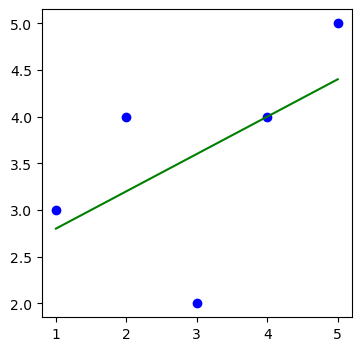

In [9]:
plt.figure(figsize=(4,4))

# Plot dataset as scatter points
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot OLS results (green line)
plt.plot(X, y_pred_ols, color='green', label='OLS Regression Line')

In [10]:
# ----------- SGD Method -----------
# Parameters for SGD
epochs = 11  # Number of iterations (epochs)
eta = 0.01  # Learning rate
w_sgd, b_sgd = 0, 0  # Initialize weights and bias

# Store the predictions at each epoch for visualization
history_y_pred = []

# Perform SGD (iterative optimization)
for epoch in range(1,epochs):
    for i in range(len(X)):
        # Prediction for the current sample
        y_pred = w_sgd * X[i] + b_sgd

        # Calculate gradients
        dw = -2 * X[i] * (y[i] - y_pred)
        db = -2 * (y[i] - y_pred)

        # Update the parameters
        w_sgd -= eta * dw
        b_sgd -= eta * db

    # Save the predictions after each epoch (complete dataset)
    y_pred_epoch = w_sgd * X + b_sgd
    print(f"For epoch {epoch} : Updated weight is {w_sgd} and bias is {b_sgd} Predictions are {y_pred_epoch}")
    history_y_pred.append(y_pred_epoch)
    

# Final SGD Predictions
y_pred_sgd = w_sgd * X + b_sgd

For epoch 1 : Updated weight is 0.729431824 and bias is 0.2603033568 Predictions are [0.98973518 1.719167   2.44859883 3.17803065 3.90746248]
For epoch 2 : Updated weight is 0.8859488172433447 and bias is 0.34427553412529865 Predictions are [1.23022435 2.11617317 3.00212199 3.8880708  4.77401962]
For epoch 3 : Updated weight is 0.9148382530217183 and bias is 0.3884691078825969 Predictions are [1.30330736 2.21814561 3.13298387 4.04782212 4.96266037]
For epoch 4 : Updated weight is 0.9153793224733011 and bias is 0.42333810470895944 Predictions are [1.33871743 2.25409675 3.16947607 4.08485539 5.00023472]
For epoch 5 : Updated weight is 0.9097053695276301 and bias is 0.45568069479461537 Predictions are [1.36538606 2.27509143 3.1847968  4.09450217 5.00420754]
For epoch 6 : Updated weight is 0.9027493521796636 and bias is 0.48702059831586714 Predictions are [1.38976995 2.2925193  3.19526865 4.09801801 5.00076736]
For epoch 7 : Updated weight is 0.8956092680965183 and bias is 0.51770540218047

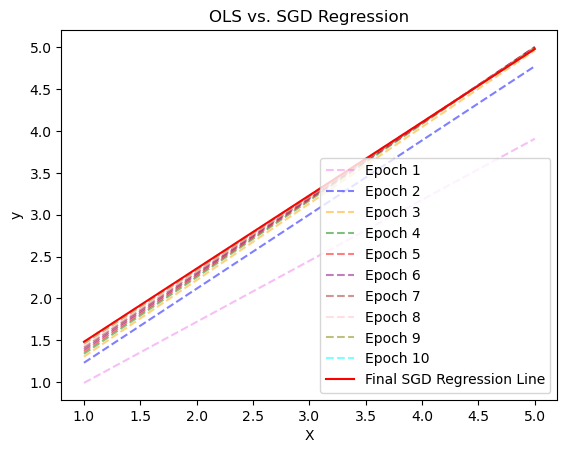

OLS Parameters: w = 0.400, b = 2.400
SGD Parameters: w = 0.875, b = 0.606


In [11]:
# Plot intermediate SGD results (dashed gray lines)
color=["violet","blue","orange","green","red","purple","brown","pink","olive","cyan"]
for i in range(len(history_y_pred)):
    plt.plot(X, history_y_pred[i], linestyle='--', color=color[i], alpha=0.5, label=f'Epoch {i + 1}')

# Plot final SGD regression line (red)
plt.plot(X, y_pred_sgd, color='red', label='Final SGD Regression Line')

plt.title('OLS vs. SGD Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print final OLS and SGD parameters
print(f"OLS Parameters: w = {w_ols:.3f}, b = {b_ols:.3f}")
print(f"SGD Parameters: w = {w_sgd:.3f}, b = {b_sgd:.3f}")
